In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cluster


In [2]:
from sklearn.cluster import KMeans

In [3]:
df= pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


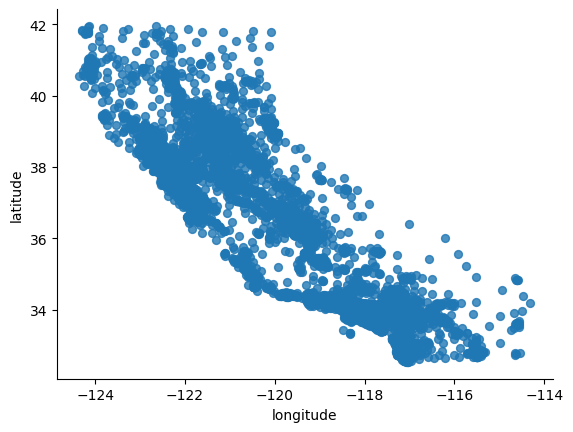

In [5]:
# @title longitude vs latitude

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
X=df.loc[:,['median_income','latitude','longitude']]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [10]:
kmeans=KMeans(n_clusters=6)
X["Cluster"]=kmeans.fit_predict(X)
X["Cluster"]=X["Cluster"].astype('category')
X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,0


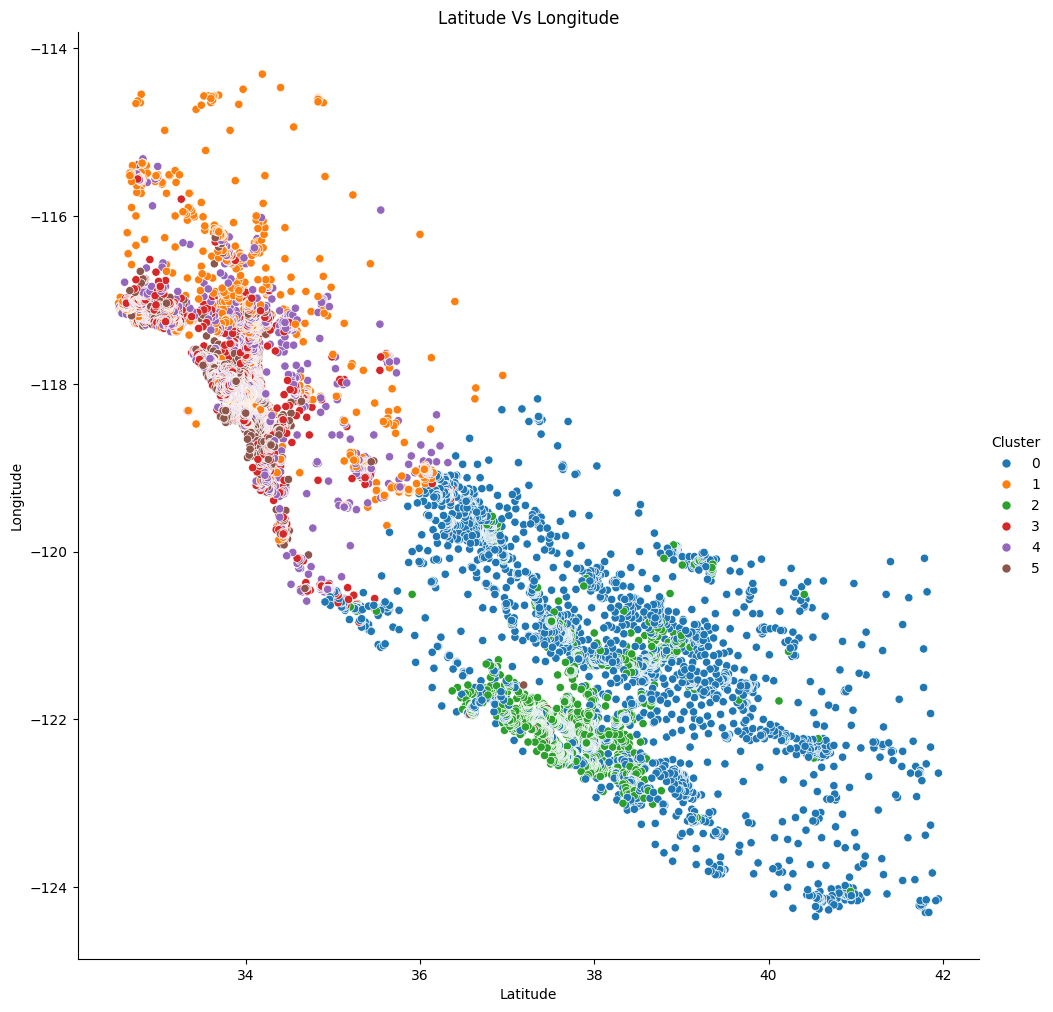

In [13]:
sns.relplot(x='latitude',y='longitude',hue='Cluster',data=X,height=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude Vs Longitude')
plt.show()

In [27]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # Indent this line
    kmeans.fit(X) # Indent this line
    wcss.append(kmeans.inertia_) # Indent this line

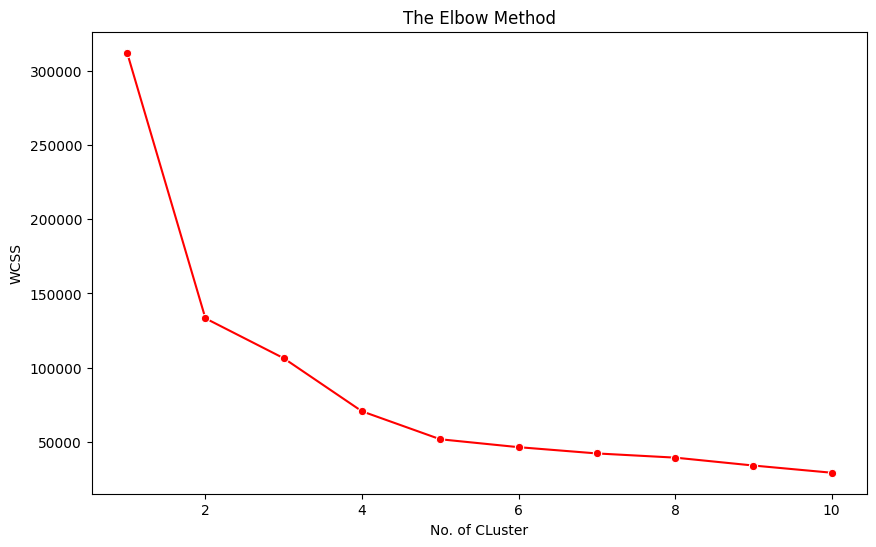

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,11),y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('No. of CLuster')
plt.ylabel('WCSS')
plt.show()